# Analyza dat

In [1]:
import pandas as pd
import matplotlib

V projekte budeme pracovat s datami MovieLens 1M. Pouzijeme 2 datasety, obsahujuce informacie o filmoch a ich hodnoteniach.

In [2]:
df_movies = pd.read_csv('../data/raw/movies.dat', sep='::', encoding = "ISO-8859-1", names=['movie_id', 'title', 'category'])
df_ratings = pd.read_csv('../data/raw/ratings.dat', sep='::', encoding = "ISO-8859-1", names=['user_id', 'movie_id', 'rating', 'timestamp'])

/home/viktoria/Documents/FIIT/NSIETE/NSIETE-project/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/viktoria/Documents/FIIT/NSIETE/NSIETE-project/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Dataset filmov obsahuje 3 atributy: id filmu, nazov filmu a kategoriu.

In [19]:
df_movies.head()


,movie_id,title,category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


V datasete sa nachadza 3883 zaznamov, ktore su plnohodnotne a pre nijaky atribut nechybaju udaje.

In [4]:
df_movies.info()

movie_id    3883
title       3883
category    3883
dtype: int64

Dataset hodnoteni obsahuje 4 atributy: id filmu, id pouzivatela, hodnotenie a cas hodnotenia.

In [6]:
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


V datasete sa nachadza 1000209 zaznamov, ktore su plnohodnotne a pre nijaky atribut nechybaju udaje.

In [28]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 30.5 MB


Hodnotenia filmov su definovane na skale od 1 do 5. Priemerne hodnotenie je 3,58 so standardnou odchylkou 1,12.

In [3]:
df_ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Najcastejsie udelovane hodnotenie je 4, zatial co najmenej caste je 1.

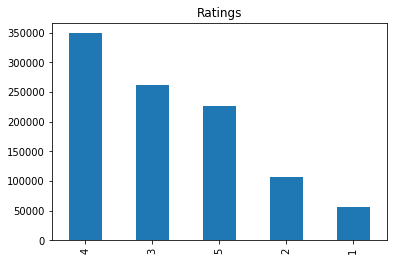

In [37]:
df_ratings['rating'].value_counts().plot(kind='bar', title='Ratings')

Najnizsi pocet hodnoteni filmov udelenych jednym pouzivatelom je 20.

In [11]:
df_ratings.groupby('user_id')['rating'].count().min()

20

Priemerny pocet hodnoteni filmov udelenych jednym pouzivatelom je 166.


In [12]:
df_ratings.groupby('user_id')['rating'].count().mean()

165.5975165562914

Najvyssi pocet hodnoteni filmov udelenych jednym pouzivatelom je 2314.

In [13]:
df_ratings.groupby('user_id')['rating'].count().max()

2314

Najnizsi pocet hodnoteni jedneho filmu je 1.

In [15]:
df_ratings.groupby('movie_id')['rating'].count().min()

1

Priemerny pocet hodnoteni jedneho filmu je 270.

In [18]:
df_ratings.groupby('movie_id')['rating'].count().mean()

AttributeError: 'Series' object has no attribute 'modus'

Najvyssi pocet hodnoteni jedneho filmu je 3428.

In [17]:
df_ratings.groupby('movie_id')['rating'].count().max()

3428

Cas hodnotenia je vyjadreny ako cislo, preto si ho prekonvertujeme na casovy udaj.

In [23]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')

Hodnotenia filmov pochadzaju z casoveho obdobia takmer 3 rokov a to od 25.4.2000 do 28.2.2003.

In [26]:
df_ratings['timestamp'].min().to_pydatetime()

datetime.datetime(2000, 4, 25, 23, 5, 32)

In [27]:
df_ratings['timestamp'].max().to_pydatetime()



datetime.datetime(2003, 2, 28, 17, 49, 50)